In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
from tqdm.auto import tqdm

# Set plotting style
from matplotlib import rcParams
# Type 2/TrueType fonts
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
# Arial font
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"

# Paths and Configs
import yaml
with open('../configuration/config.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
TEMPDIR = Path(config['TEMPDIR'])

#   SRR21146078: control-oDam-replicate-1
#   SRR21146077: control-oDam-replicate-2
#   SRR21146076: control-oDam-replicate-3
#   SRR21146075: oDam-Pros-replicate-1
#   SRR21146074: oDam-Pros-replicate-2
#   SRR21146073: oDam-Fer1-replicate-1
#   SRR21146072: oDam-Fer1-replicate-2
#   SRR21146071: oDam-Fer1-replicate-3


In [4]:
# Load gene and transcript information
with open('../../gene_info.yaml') as f:
    gene_info = yaml.load(f, Loader=yaml.FullLoader)

# MACS2

In [2]:
# TEMPDIR / "macs2/SRR21146075_vs_SRR21146078_peaks.narrowPeak", # Rep1
# TEMPDIR / "macs2/SRR21146074_vs_SRR21146077_peaks.narrowPeak", # Rep2

In [3]:
file = '../results/SRR21146074_vs_SRR21146077_annotated_peaks_2.csv'
df = pd.read_csv(file, index_col=0)

In [4]:
df[df['gene'] == 'CG9650']

,chrom,chromStart,chromEnd,score,strand,signalValue,pValue,qValue,peak,annotation,geneStart,geneEnd,geneLength,geneId,transcriptId,distanceToTSS,gene,gene_start,gene_end
name,,,,,,,,,,,,,,,,,,,
SRR21146074_vs_SRR21146077_peak_4405,X,7138373,7138383,40,.,5.48537,7.66046,4.05926,6,Promoter (<=1kb),7137723,7241932,104210,FBgn0029939,FBtr0301240,657,CG9650,7137723.0,7241932.0
SRR21146074_vs_SRR21146077_peak_4406,X,7195195,7195379,78,.,8.38668,12.18212,7.82175,66,Promoter (<=1kb),7196029,7241932,45904,FBgn0029939,FBtr0309030,-767,CG9650,7137723.0,7241932.0
SRR21146074_vs_SRR21146077_peak_4407,X,7232877,7232919,15,.,4.00171,4.37700,1.50780,35,"Exon (FBtr0339815/FBgn0029939, exon 4 of 5)",7226455,7241538,15084,FBgn0029939,FBtr0474235,6458,CG9650,7137723.0,7241932.0


In [5]:
from gtfparse import read_gtf
gtf = read_gtf("/g/huber/users/peidli/utils/genomes/drosophila_melanogaster/Drosophila_melanogaster.BDGP6.46.110.gtf")
gtf = pd.DataFrame(gtf, columns=gtf.columns)
sgtf = gtf[gtf.gene_name == 'CG9650'].copy()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_id', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_number', 'exon_id', 'protein_id', 'tag']


In [6]:
TSS = {
    'FBtr0309030': 7193865 - (-2104),
    # 'FBtr0474234': 7226124 - (-48),
    # 'FBtr0474235': 7228202 - (1898),
    'FBtr0474234/FBtr0474235': 7228202 - (1898)
}

transcripts = sgtf[(sgtf.feature=='transcript') & (sgtf.start > 7.16 * 1e6)]
transcripts.transcript_id.replace({'FBtr0474235': 'FBtr0474234/FBtr0474235', 'FBtr0474234': 'FBtr0474234/FBtr0474235'}, inplace=True)
transcripts = transcripts[~transcripts.transcript_id.duplicated()]

exons = sgtf[(sgtf.feature=='exon') & (sgtf.transcript_id.isin(['FBtr0309030', 'FBtr0474234', 'FBtr0474235']))]
exons = exons.iloc[:4]  # only main exons

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 48 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'G', 'L', 'M', 'P', 'S', 'T', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'i', 'k', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'slash', 'space', 't', 'three', 'two', 'u', 'w', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 40, 41, 4

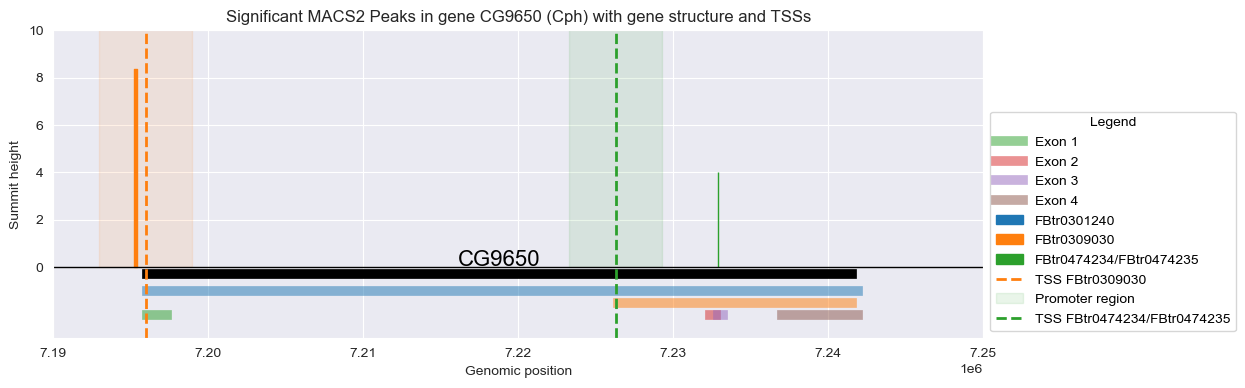

In [8]:
with sns.axes_style('darkgrid'):
    fig, ax = pl.subplots(figsize=(12, 4))

ykey = 'signalValue'
start, end = 7196029, 7241538
gene_name = 'CG9650'

# get gene info
sdf = df[df['gene'] == gene_name]
sdf.transcriptId.replace({'FBtr0474235': 'FBtr0474234/FBtr0474235', 'FBtr0474234': 'FBtr0474234/FBtr0474235'}, inplace=True)  # merge transcripts since largely overlapping and TSS close
palette = dict(zip(sdf.transcriptId.unique(), sns.color_palette('tab10', len(sdf.transcriptId.unique()))))

# remove substrings like "FBtr0339815/FBgn0029939 " from annotation with regex
sdf['annotation_clean'] = sdf['annotation'].str.replace(r'FB(gn|tr)\d+', '', regex=True).str.replace('/, ', '').str.replace('\(intron ', '(').str.replace('\(exon ', '(')

# add horizontal annotations
offset = -0.3
ax.axhline(0, color='black', linewidth=1)
ax.plot([start, end], [offset, offset], color='black', linewidth=7)
ax.text((start + end)/2, offset + 0.2, gene_name, fontsize=16, ha='center', va='bottom')
# add transcript annotations
for i, (idx, row) in enumerate(transcripts.iterrows()):
    start = row['start']
    end = row['end']
    offset = -1 - i/2
    pl.plot([start, end], [offset, offset], linewidth=7, alpha=0.5)
    i+=1
# add exon annotations
for i, (idx, row) in enumerate(exons.iterrows()):
    start = row['start']
    end = row['end']
    offset = -2
    pl.plot([start, end], [offset, offset], linewidth=7, alpha=0.5, label=f'Exon {i+1}')

# Add peaks
# texts = []
for idx, tag in sdf.iterrows():
    transcript = tag.transcriptId  # color by this
    ax.fill_between([tag.chromStart, tag.chromEnd], [tag[ykey], tag[ykey]], 0, color=palette[transcript], alpha=1, label=transcript)
    x = (tag.chromStart + tag.chromEnd)/2
    y = tag[ykey]
    # text = ax.annotate(tag.annotation_clean, 
    #                    xy=(x, y), 
    #                    xytext=(x, y+3), 
    #                    fontsize=6, ha='left', va='bottom', rotation=0,
    #                    arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5))
    # texts.append(text)

# Add TSS
for transcript, pos in TSS.items():
    color = palette[transcript]
    ax.axvline(pos, color=color, linestyle='--', linewidth=2, label=f'TSS {transcript}')
    ax.fill_between([pos-3000, pos+3000], [0, 0], [80, 80], color=color, alpha=0.1, label='Promoter region')

# Plot options
ax.set_ylabel('Summit height')
ax.set_xlabel('Genomic position')
ax.set_title('Significant MACS2 Peaks in gene CG9650 (Cph) with gene structure and TSSs')
ax.set_ylim(-3, 10)
ax.set_xlim(7190000, 7250000)
ax.set_yticks([0,2,4,6,8,10])

# from adjustText import adjust_text
# adjust_text(texts, only_move={'text':'y'}, expand=(1,1))

# Make legend show unique entries
handles, labels = pl.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pl.legend(by_label.values(), by_label.keys(), title='Legend', loc='lower left', bbox_to_anchor=(1, 0))
pl.savefig('../results/figures/peaks_in_gene_CG9650.pdf', bbox_inches='tight')
pl.show()

In [9]:
file = '../results/SRR21146075_vs_SRR21146078_annotated_peaks_2.csv'
df = pd.read_csv(file, index_col=0)

In [10]:
TSS = {
    'FBtr0309030': 7193865 - (-2104),
    # 'FBtr0474234': 7226124 - (-48),
    # 'FBtr0474235': 7228202 - (1898),
    'FBtr0474234/FBtr0474235': 7228202 - (1898)
}

transcripts = sgtf[(sgtf.feature=='transcript') & (sgtf.start > 7.16 * 1e6)]
transcripts.transcript_id.replace({'FBtr0474235': 'FBtr0474234/FBtr0474235', 'FBtr0474234': 'FBtr0474234/FBtr0474235'}, inplace=True)
transcripts = transcripts[~transcripts.transcript_id.duplicated()]

exons = sgtf[(sgtf.feature=='exon') & (sgtf.transcript_id.isin(['FBtr0309030', 'FBtr0474234', 'FBtr0474235']))]
exons = exons.iloc[:4]  # only main exons

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 48 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'G', 'L', 'M', 'P', 'S', 'T', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'i', 'k', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'slash', 'space', 't', 'three', 'two', 'u', 'w', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 40, 41, 4

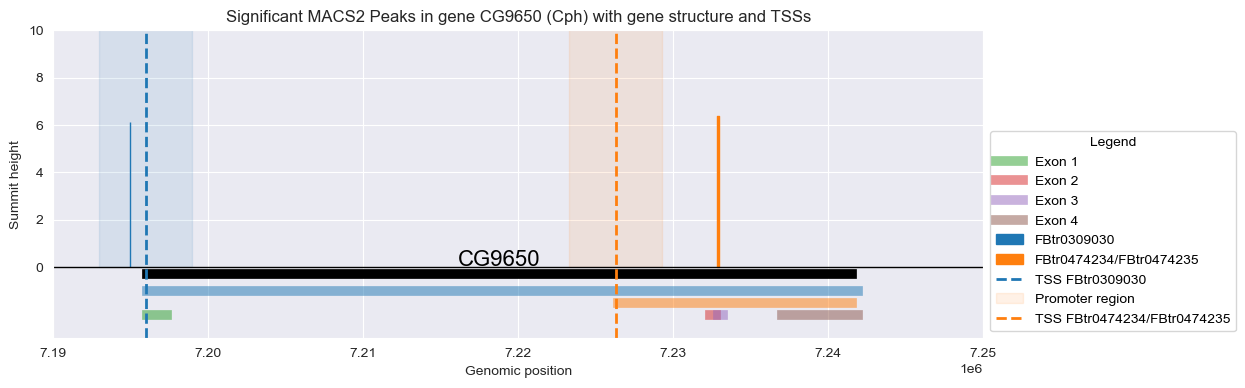

In [11]:
with sns.axes_style('darkgrid'):
    fig, ax = pl.subplots(figsize=(12, 4))

ykey = 'signalValue'
start, end = 7196029, 7241538
gene_name = 'CG9650'

# get gene info
sdf = df[df['gene'] == gene_name]
sdf.transcriptId.replace({'FBtr0474235': 'FBtr0474234/FBtr0474235', 'FBtr0474234': 'FBtr0474234/FBtr0474235'}, inplace=True) # merge transcripts since largely overlapping and TSS close
palette = dict(zip(sdf.transcriptId.unique(), sns.color_palette('tab10', len(sdf.transcriptId.unique()))))

# remove substrings like "FBtr0339815/FBgn0029939 " from annotation with regex
sdf['annotation_clean'] = sdf['annotation'].str.replace(r'FB(gn|tr)\d+', '', regex=True).str.replace('/, ', '').str.replace('\(intron ', '(').str.replace('\(exon ', '(')

# add horizontal annotations
offset = -0.3
ax.axhline(0, color='black', linewidth=1)
ax.plot([start, end], [offset, offset], color='black', linewidth=7)
ax.text((start + end)/2, offset + 0.2, gene_name, fontsize=16, ha='center', va='bottom')
# add transcript annotations
for i, (idx, row) in enumerate(transcripts.iterrows()):
    start = row['start']
    end = row['end']
    offset = -1 - i/2
    pl.plot([start, end], [offset, offset], linewidth=7, alpha=0.5)
    i+=1
# add exon annotations
for i, (idx, row) in enumerate(exons.iterrows()):
    start = row['start']
    end = row['end']
    offset = -2
    pl.plot([start, end], [offset, offset], linewidth=7, alpha=0.5, label=f'Exon {i+1}')

# Add peaks
# texts = []
for idx, tag in sdf.iterrows():
    transcript = tag.transcriptId  # color by this
    ax.fill_between([tag.chromStart, tag.chromEnd], [tag[ykey], tag[ykey]], 0, color=palette[transcript], alpha=1, label=transcript)
    x = (tag.chromStart + tag.chromEnd)/2
    y = tag[ykey]
    # text = ax.annotate(tag.annotation_clean, 
    #                    xy=(x, y), 
    #                    xytext=(x, y+3), 
    #                    fontsize=6, ha='left', va='bottom', rotation=0,
    #                    arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5))
    # texts.append(text)

# Add TSS
for transcript, pos in TSS.items():
    color = palette[transcript]
    ax.axvline(pos, color=color, linestyle='--', linewidth=2, label=f'TSS {transcript}')
    ax.fill_between([pos-3000, pos+3000], [0, 0], [80, 80], color=color, alpha=0.1, label='Promoter region')

# Plot options
ax.set_ylabel('Summit height')
ax.set_xlabel('Genomic position')
ax.set_title('Significant MACS2 Peaks in gene CG9650 (Cph) with gene structure and TSSs')
ax.set_ylim(-3, 10)
ax.set_xlim(7190000, 7250000)
ax.set_yticks([0,2,4,6,8,10])

# from adjustText import adjust_text
# adjust_text(texts, only_move={'text':'y'}, expand=(1,1))

# Make legend show unique entries
handles, labels = pl.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pl.legend(by_label.values(), by_label.keys(), title='Legend', loc='lower left', bbox_to_anchor=(1, 0))
pl.savefig('../results/figures/peaks_in_gene_CG9650_alternative_processing.pdf', bbox_inches='tight')
pl.show()

# DiffBind

In [2]:
df = pd.read_csv('../results/tables/diffbind_results.tsv', sep='\t', index_col=0)

In [3]:
df

,start,end,width,strand,Conc,Conc_Pros,Conc_control,Fold,p.value,FDR
seqnames,,,,,,,,,,
X,15459203,15460581,1379,*,10.067721,6.664593,10.749080,-3.990518,1.243230e-27,4.353170e-23
3L,17038204,17039170,967,*,10.180435,7.817041,10.800657,-2.908131,6.403945e-25,1.121171e-20
2L,1936321,1937096,776,*,9.852534,7.689885,10.454487,-2.691258,3.137042e-24,3.661451e-20
X,7219603,7220003,401,*,9.147572,6.568918,9.784550,-3.092341,2.030129e-21,1.777124e-17
X,10897408,10897808,401,*,8.378238,3.606440,9.093923,-5.301441,5.484912e-21,3.841084e-17
...,...,...,...,...,...,...,...,...,...,...
X,23510700,23511604,905,*,4.270506,3.752174,4.535000,-0.227849,1.000000e+00,1.000000e+00
Y,742571,742971,401,*,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
Y,864024,864424,401,*,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00


In [5]:
genes = pd.DataFrame([
    ['Cph', 'X', 7137723, 7241932],  # region in and around Cph
], columns=['name', 'chr', 'start', 'end']).set_index('name')

In [6]:
for gene in genes.index:
    chr, start, end = genes.loc[gene].values
    df[gene] = False
    df['gene_region'] = 'None'
    df.loc[(df.index == chr) & (df.start >= start) & (df.end <= end), gene] = True
    df.loc[(df.index == chr) & (df.start >= start) & (df.end <= end), 'gene_region'] = gene
df['significance_score'] = -np.log10(df['FDR'])

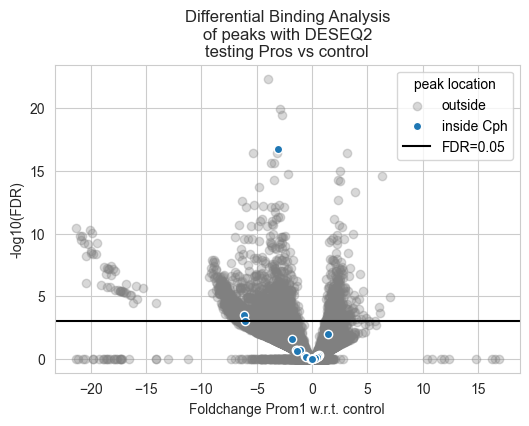

In [7]:
with sns.axes_style('whitegrid'):
    fig, ax = pl.subplots(figsize=(6,4))
ax.scatter(x=df.loc[df.gene_region=='None', 'Fold'], y=df.loc[df.gene_region=='None', 'significance_score'], color='grey', label='outside', alpha=0.3)
for gene in genes.index[::-1]:
    ax.scatter(x=df.loc[df[gene], 'Fold'], y=df.loc[df[gene], 'significance_score'], edgecolor='white', label=f'inside {gene}')
pl.axhline(-np.log10(0.001), label='FDR=0.05', c='k')
pl.legend(title='peak location')
pl.title('Differential Binding Analysis\nof peaks with DESEQ2\ntesting Pros vs control')
pl.xlabel('Foldchange Prom1 w.r.t. control')
pl.ylabel('-log10(FDR)')
pl.savefig('../results/figures/diffbind_results.pdf', bbox_inches='tight')
pl.show()